# Live Coding Pyomo

In [29]:
from pyomo.environ import *

from pyomo.opt import SolverFactory

import matplotlib.pyplot as plt

Sets:
$$T = T_1, T_2 \dots T_11$$
Parameters:
Priorty of each task:
$$P_i = \forall i \in T$$
History points of each task:
$$H_i = \forall i \in T$$
Total of history points:
$$H = TotalHP $$
Decision Variables:
$$X_i = \forall i \in T$$
Objective Function:
$$\text{Maximize} \sum_{i \in T} P_i \times X_i$$
Constraints:
$$\sum_{i \in T} X_i \leq TotalHP$$

In [30]:
Model = ConcreteModel()

T=RangeSet(1,11)

NUM_DESARROLLADORES = 4

MAX_PUNTOS = 13

puntos_historia = {
    1: 5,
    2: 3,
    3: 13,
    4: 1,
    5: 21,
    6: 2,
    7: 2,
    8: 5,
    9: 8,
    10: 13,
    11: 21
}

prioridad = {
    "Maxima": 7,
    "Alta": 6,
    "Media Alta": 5,
    "Media": 4,
    "Media Baja": 3,
    "Baja": 2,
    "Minima": 1
}

prioridad_puntos = {
    1: "Maxima",
    2: "Media Alta",
    3: "Alta",
    4: "Media Baja",
    5: "Minima",
    6: "Media",
    7: "Alta",
    8: "Media",
    9: "Baja",
    10: "Maxima",
    11: "Alta"
}

num_prioridad_puntos = {}
for pp in prioridad_puntos:
    print(pp)
    num_prioridad_puntos[pp] = prioridad[prioridad_puntos[pp]]

print(num_prioridad_puntos)

Model.x = Var(T, domain=Binary)

Model.obj = Objective(expr=sum(Model.x[t]*num_prioridad_puntos[t] for t in T), sense=maximize)

Model.con1 = Constraint(expr=sum(Model.x[t] * puntos_historia[t] for t in T) <= MAX_PUNTOS*NUM_DESARROLLADORES)

SolverFactory('glpk').solve(Model)

Model.display()




1
2
3
4
5
6
7
8
9
10
11
{1: 7, 2: 5, 3: 6, 4: 3, 5: 1, 6: 4, 7: 6, 8: 4, 9: 2, 10: 7, 11: 6}
Model unknown

  Variables:
    x : Size=11, Index=[1:11]
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   1.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  44.0


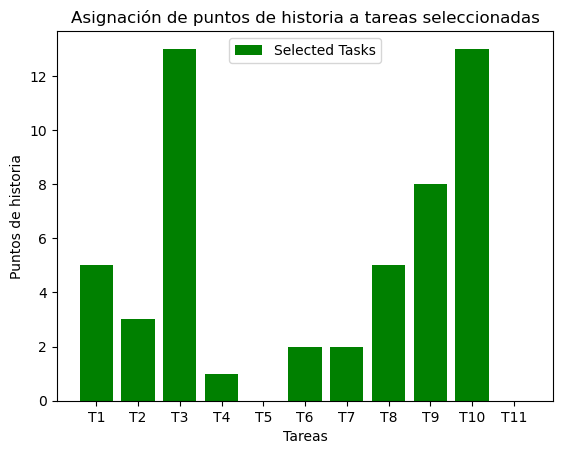

In [31]:
tasks = list(T)
story_points = [puntos_historia[t] for t in T]

selected = [Model.x[t]() for t in T]  # Task selection status (0 or 1)

# Creating a stacked bar chart
plt.bar(tasks, [sp * sel for sp, sel in zip(story_points, selected)], color='green', label='Selected Tasks')

plt.xlabel("Tareas")
plt.ylabel("Puntos de historia")
plt.title("Asignación de puntos de historia a tareas seleccionadas")

# Adding labels
plt.xticks(tasks, [f"T{i}" for i in tasks])
plt.legend()

plt.show()

# Problem 2:

Sets:
- Workers
- Tasks

Parameters:
- Value of each task
- Time of each task
- Time of each worker

Decision Variables:
- $X_{w,t} = \space \forall w \in \text{Workers}, t \in \text{Tasks}$

Objective Function:

- Maximize the value of the tasks
$$\text{Maximize} \sum_{w \in \text{Workers}, t \in \text{Tasks}} X_{w,t} \times \text{Value}_{t}$$

Restrictions:

- Each task can only be done by one worker
$$\sum_{w \in \text{Workers}} X_{w,t} = 1 \space \forall t \in \text{Tasks}$$
- The time of the tasks must be less than the time of the worker
$$\sum_{t \in \text{Tasks}} X_{w,t} \times \text{Time}_{t} \leq \text{Worker time}_{w} \space \forall w \in \text{Workers}$$

In [32]:
model = ConcreteModel()

Tasks = RangeSet(1, 5)

Workers = RangeSet(1, 3)

trabajadores = {1:8, 2:10, 3:6}

trabajo_tiempo = {1:4, 2:5, 3:3, 4:6, 5:2}

trabajo_ganancia = {1:50, 2:60, 3:40, 4:70, 5:30}

model.x = Var(Workers, Tasks, domain=Binary)

model.obj = Objective(expr=sum(model.x[w,t]*trabajo_ganancia[t] for w in Workers for t in Tasks), sense=maximize)

def constraint1(model, t):
    return sum(model.x[w,t] for w in Workers) <= 1

model.constraint1 = Constraint(Tasks, rule = constraint1)

def constraint2(model, w):
    return sum(model.x[w,t]*trabajo_tiempo[t] for t in Tasks) <= trabajadores[w]

model.constraint2 = Constraint(Workers, rule = constraint2)

SolverFactory('glpk').solve(model)

model.display()


Model unknown

  Variables:
    x : Size=15, Index=[1:3]*[1:5]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   1.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   1.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   1.0 :     1 : 

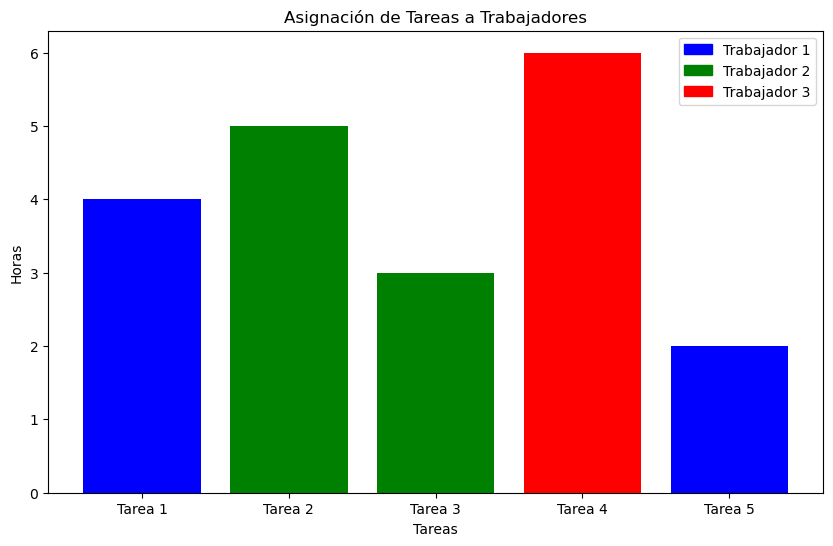

In [33]:
# Inicializar listas para almacenar los datos del gráfico
tareas = []
horas = []
colores = []

# Definir colores para cada trabajador
color_map = {1: 'blue', 2: 'green', 3: 'red'}

# Recopilar datos del modelo
for t in Tasks:
    for w in Workers:
        if model.x[w,t].value == 1:  # Si la tarea t es realizada por el trabajador w
            tareas.append(f'Tarea {t}')
            horas.append(trabajo_tiempo[t])
            colores.append(color_map[w])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tareas, horas, color=colores)

# Añadir etiquetas y título
plt.xlabel('Tareas')
plt.ylabel('Horas')
plt.title('Asignación de Tareas a Trabajadores')

# Mostrar leyenda
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[w]) for w in Workers]
labels = [f'Trabajador {w}' for w in Workers]
plt.legend(handles, labels)

# Mostrar el gráfico
plt.show()

# Problem 3: Humanitarian Aid to Zambia

Sets:
- Planes
- resources

Parameters:
- Value of each resource (V)
- Weight of each resource (I)
- Volume of each resource (J)
- Capacity of each plane (K)
- volumetric capacity of each plane (L)

Decision Variables:
- $X_{p,r} = \forall p \in \text{Planes}, r \in \text{Resources}$

Objective Function:

- Maximize the value of the resources
$$\text{Maximize} \sum_{p \in \text{Planes}, r \in \text{Resources}} X_{p,r} \times \text{V}_{r}$$

Restrictions:

- Each resource can only be carried by one plane
$$\sum_{p \in \text{Planes}} X_{p,r} = 1 \space \forall r \in \text{Resources}$$
- The weight of the resources must be less than the capacity of the planes
$$\sum_{r \in \text{Resources}} X_{p,r} \times \text{Weight}_{r} \leq \text{Weight}_{p} \space \forall p \in \text{Planes}$$
- The volume of the resources must be less than the volumetric capacity of the planes
$$\sum_{r \in \text{Resources}} X_{p,r} \times \text{Volume}_{r} \leq \text{Volume}_{p} \space \forall p \in \text{Planes}$$
- Medicines cannot be transported in Plane 1
$$X_{Plane \space 1, Medicines} = 0$$

- Medical Equipment and Drinking Water cannot be transported in the same aircraft. 
$$X_{p, Medicines} + X_{p, Water} \leq 1 \space \forall p \in \text{Planes}$$


In [34]:
Model  = ConcreteModel()

Planes = RangeSet(1, 3)

Resources = RangeSet(1, 5)

planes_weight = {1:30, 2:40, 3:50}

planes_volume = {1:25, 2:30, 3:35}

resources_name = {1:"Alimentos Básicos", 2:"Medicinas", 3:"Equipos médicos", 4:"Agua potable", 5:"Mantas"}

resources_value = {1:50, 2:100, 3:120, 4:60, 5:40}

resources_weight = {1:15, 2:5, 3:20, 4:18, 5:10}

resources_volume = {1:8, 2:2, 3:10, 4:12, 5:6}

Model.x = Var(Planes, Resources, domain=Binary)

Model.obj = Objective(expr=sum(Model.x[p,r]*resources_value[r] for p in Planes for r in Resources), sense=maximize)

def ConstraintOneResource(Model, r):
    return sum(Model.x[p,r] for p in Planes) <= 1

Model.ConstraintOneResource = Constraint(Resources, rule = ConstraintOneResource)

def WeightConstraint(Model, p):
    return sum(Model.x[p,r]*resources_weight[r] for r in Resources) <= planes_weight[p]

Model.WeightConstraint = Constraint(Planes, rule = WeightConstraint)

def VolumeConstraint(Model, p):
    return sum(Model.x[p,r]*resources_volume[r] for r in Resources) <= planes_volume[p]

Model.VolumeConstraint = Constraint(Planes, rule = VolumeConstraint)

def NoMedicinesInPlane1(Model):
    return Model.x[1, 2] == 0  # Medicinas es el recurso 2 y Avión 1 es el avión 1

Model.NoMedicinesInPlane1 = Constraint(rule=NoMedicinesInPlane1)

def CompabilityConstraint(Model, p):
    return Model.x[p, 3] + Model.x[p, 4] <= 1  # Equipos Médicos es el recurso 3 y Agua Potable es el recurso 4

Model.CompabilityConstraint = Constraint(Planes, rule=CompabilityConstraint)

SolverFactory('glpk').solve(Model)

Model.display()

Model unknown

  Variables:
    x : Size=15, Index=[1:3]*[1:5]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   1.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   1.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   1.0 :     1 : 